## 0. Simulate phone dataset 

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 






(400,) (400,)
 Number of calls more than 300 min 11
Minumum number of costs 8


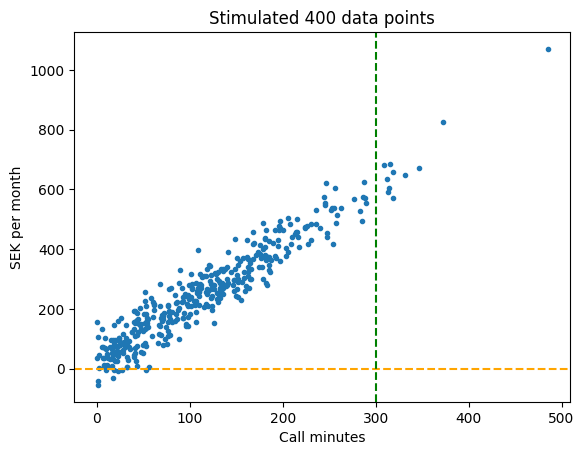

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
samples = 400

X = np.random.normal(100,100,samples) # random input N(100,100) for 400 samples
x = np.abs(X) # to take absolute values

epsilon = np.random.normal(0,50, samples) #  N(0,50) for 400 noise values
print(epsilon.shape, x.shape)

y = 2*x + 25 +epsilon # y = y = 25 + 2x + e

fig, ax = plt.figure(), plt.axes()
ax.plot(x,y, '.')
ax.axhline(y= 0, color ="orange",linestyle="--") # include minimum boundary value 
ax.axvline(x = 300, color ="green",linestyle="--") # include maximum boundary value

ax.set(xlabel = "Call minutes", ylabel = "SEK per month", title ="Stimulated 400 data points") # add tittle and labels

print(" Number of calls more than 300 min",len(x[x >= 300]))
print("Minumum number of costs",len(y[y < 0]))




&nbsp; b) Now we want to remove some outliers according to this assumption: 
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$


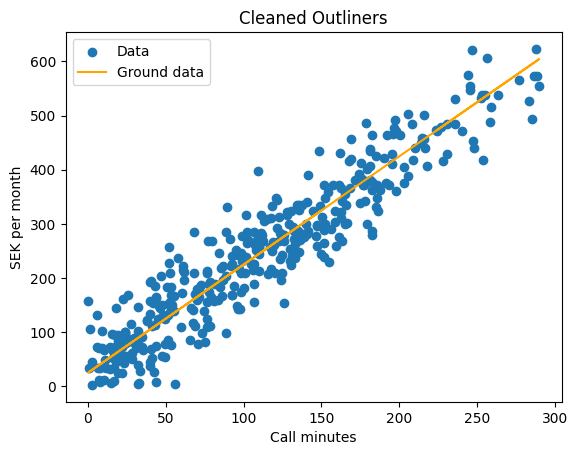

In [60]:
outliers = (x < 300) & (y > 0) # create a mask variable
X = x[outliers] # adding mask to x
y = y[outliers] # adding mask to y
X.shape, y.shape

fig, ax = plt.figure(), plt.axes()
ax.scatter(X,y,label = "Data") # plot the data
ax.plot(X, 25 + 2* X, color = 'orange', label = "Ground data") # plot ground truth 25 + 2*x

ax.set(xlabel = "Call minutes", ylabel = "SEK per month", title ="Cleaned Outliners") # add labels and title

ax.legend() 

&nbsp; c) Insert the values into a DataFrame 

In [61]:
df = pd.DataFrame({'minutes': X, 'cost':y})
df.head()

,minutes,cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1. Train|test split 

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: 

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```




In [62]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame,train_fraction: float,random_state: int, replace: bool )-> tuple:
    """Split the dataset into train and test sets. X is features and y is target variable in the data"""
    train_fraction = int(len(X) * train_fraction)

    train_X = X.sample(n=train_fraction, random_state=random_state, replace=replace)
    train_y = y.sample(n=train_fraction, random_state=random_state, replace=replace)

    test_X = X.drop(train_X.index)
    test_y = y.drop(train_y.index)

    X_train, y_train = pd.DataFrame(train_X),pd.DataFrame(train_y)
    X_test, y_test = pd.DataFrame(test_X), pd.DataFrame(test_y)
    
    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return(X_train, y_train, X_test, y_test)




&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. 


In [63]:
X_train, y_train, X_test, y_test = train_test_split(df['minutes'], df['cost'], train_fraction=.7,random_state=42,replace=False)
print('length of X_train: ' + str(len(X_train)))
print('length of X_test: ' + str(len(X_test)))
print('length of y_train: ' + str(len(y_train)))
print('length of y_test: ' + str(len(y_test)))


length of X_train: 266
length of X_test: 115
length of y_train: 266
length of y_test: 115


## 2. Simple linear regression with normal equation 

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 


In [64]:
X, y = df["minutes"], df["cost"]


In [65]:
X_train.shape, y_train.shape

((266, 2), (266, 1))

In [66]:
# training - we fit the weights beta_hat to the training data
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

# fitting the regression model
beta_hat = regression_fit(X_train,y_train)
beta_hat

beta_0 = beta_hat['cost'].iloc[0]
beta_1 = beta_hat['cost'].iloc[1]


# To find regression line y = b0 + b1* x
reg_line = lambda x,: beta_0 + beta_1 * x




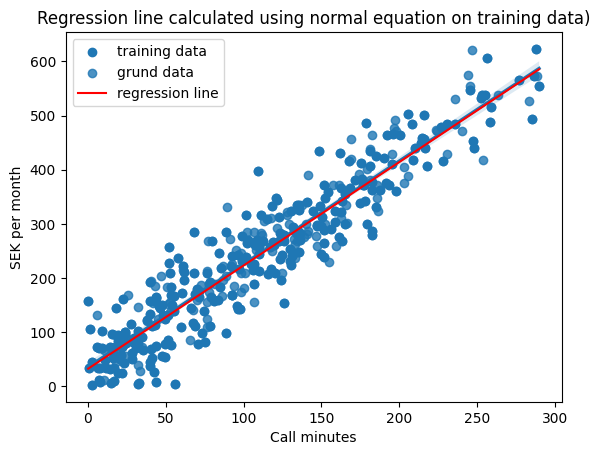

In [67]:

 
# visualizing the results

# plot for training data
plt.scatter(X_train["minutes"], y_train, label = "training data") # plotting the training data
sns.regplot(x= X, y = y, label = "grund data") # plotting the grund data line
sns.lineplot(x= X_train["minutes"], y= reg_line(X_train["minutes"]), color='red',label = "regression line") # plotting the regression line

plt.title("Regression line calculated using normal equation on training data)") # stating the title of the graph
  
plt.xlabel("Call minutes") # adding the name of x-axis
plt.ylabel("SEK per month") # adding the name of y-axis
plt.legend()
plt.show() # specifies end of graph
  



## 3. Prediction and evaluation 

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. 




In [68]:
beta_hat = regression_fit(X_test, y_test)
print(f"Beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights 

beta_hat = np.reshape(beta_hat.to_numpy(), (2,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

Beta parameters:
        cost
0  45.921991
1   1.870323


array([[207.0943707 ],
       [189.16002011],
       [145.14739847],
       [216.73486383],
       [181.50501531]])

In [69]:
X_test.shape, y_hat.shape

((115, 2), (115, 1))

In [70]:
y_hat_pred = np.reshape(y_hat, -1) # to plot reshape the y_hat
y_hat_pred.shape

(115,)

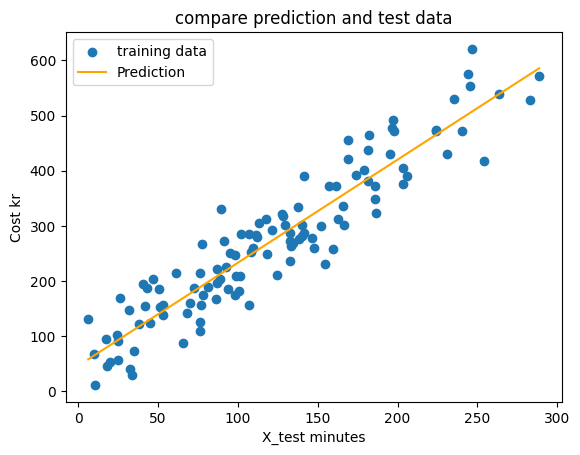

In [71]:
# visualizing the results

# plot for test data
plt.scatter(X_test["minutes"], y_test, label = "training data") # plotting the test data
sns.lineplot(x= X_test["minutes"], y= y_hat_pred, color='orange',label = "Prediction") # plotting the  Cost Prediction 

plt.title("compare prediction and test data") # stating the title of the graph
  
plt.xlabel("X_test minutes") # adding the name of x-axis
plt.ylabel("Cost kr") # adding the name of y-axis
plt.legend()
plt.show() # specifies end of graph
  



&nbsp; b) Calculate MAE, MSE, RMSE 

In [72]:
y_hat[:5] # array


array([[207.0943707 ],
       [189.16002011],
       [145.14739847],
       [216.73486383],
       [181.50501531]])

In [73]:
y_test[:5] # dataframe

,cost
1,167.378389
4,155.666051
8,137.119904
13,271.539890
14,186.599267


In [74]:
y_test = y_test.to_numpy() # datafarme to numpy array

In [75]:

m = len(y_test)

y_hat.shape, y_test.shape

((115, 1), (115, 1))

In [76]:

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

print(f"Mean absolute error on testing data: {mean_absolute_error:.2f} kr ")
print(f"Mean squared error on testing data: {mean_squared_error:.2f} kr")
print(f"Root mean square error on testing data: {root_mean_squared_error:.2f} kr") 


Mean absolute error on testing data: 39.60 kr 
Mean squared error on testing data: 2316.27 kr
Root mean square error on testing data: 48.13 kr


## 4. Simulate more explanatory variables 

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$



&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones.

In [77]:
samples = 10000
np.random.seed(42)

X_1 = np.random.normal(100,100,samples) # random input N(100,100) for samples
X_1 = np.abs(X_1) # to take absolute values

X_2 = np.random.uniform(0,50,samples)

X_3= np.random.normal(0,2,samples) # random input N(0,2) for  samples
X_3 = np.abs(X_3) # to take absolute values

epsilon = np.random.normal(0,50, samples) #  N(0,50)

y = 25 + 2* X_1 + 0.5 * X_2 + 50 *X_3 + epsilon

print(X_1.shape, X_2.shape, X_3.shape, y.shape)

# save data to dataframe
df = pd.DataFrame({'Minutes': X_1,'SMS':X_2,'Surf(GB)':X_3, 'Cost':y}) 
df.head()


(10000,) (10000,) (10000,) (10000,)


,Minutes,SMS,Surf(GB),Cost
0,149.671415,16.062759,0.958919,397.262506
1,86.173570,5.150960,2.056136,282.885394
2,164.768854,3.590377,1.004004,458.575762
3,252.302986,4.713799,3.413725,665.771078
4,76.584663,29.143468,0.535679,154.615402


In [78]:
df.insert(0, "Intercept", 1)
df.head()

,Intercept,Minutes,SMS,Surf(GB),Cost
0,1,149.671415,16.062759,0.958919,397.262506
1,1,86.173570,5.150960,2.056136,282.885394
2,1,164.768854,3.590377,1.004004,458.575762
3,1,252.302986,4.713799,3.413725,665.771078
4,1,76.584663,29.143468,0.535679,154.615402


&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ 

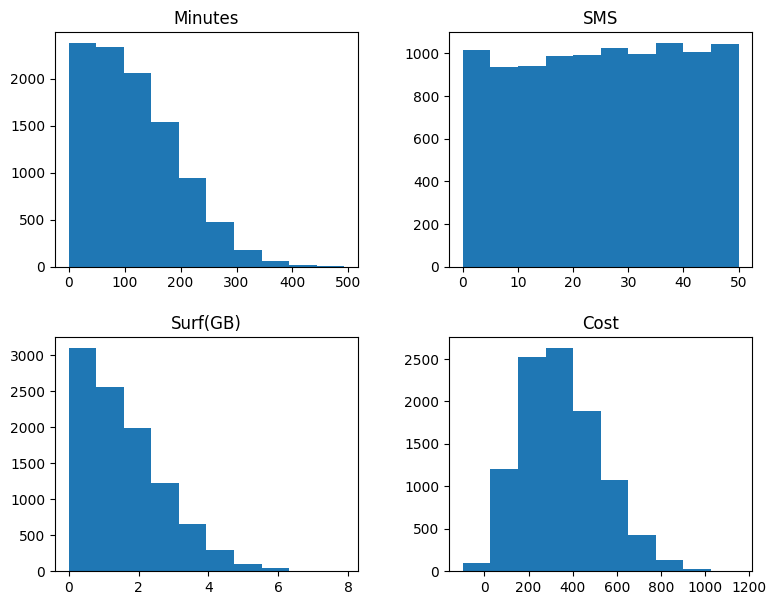

In [79]:
df[['Minutes','SMS','Surf(GB)','Cost']].hist(figsize=(9,7),grid = False)
plt.show()

&nbsp; c) Clean the data using the following constraints 

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

In [89]:
Surf = df.query('`Surf(GB)` < 4')

In [ ]:
df= df.query('`Surf(GB)` < 4 &  `Minutes`<300 &  `Cost`>0')
df.head()

,Intercept,Minutes,SMS,Surf(GB),Cost
0,1,149.671415,16.062759,0.958919,397.262506
1,1,86.173570,5.150960,2.056136,282.885394
2,1,164.768854,3.590377,1.004004,458.575762
3,1,252.302986,4.713799,3.413725,665.771078
4,1,76.584663,29.143468,0.535679,154.615402



&nbsp; d) Make new histograms for the variables


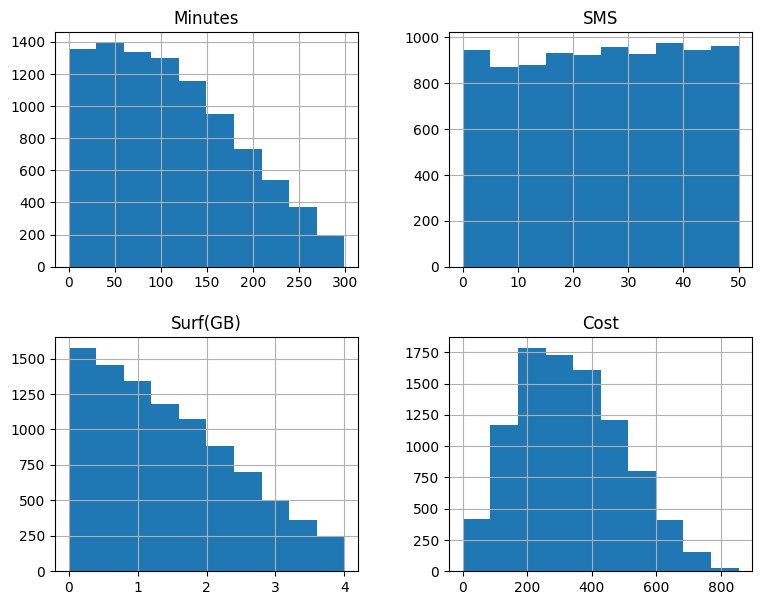

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(9,7)) # shows the figure size

df.hist("Minutes", ax=ax[0, 0])
df.hist("SMS", ax=ax[0, 1])
df.hist("Surf(GB)", ax=ax[1, 0])
df.hist("Cost", ax=ax[1, 1])

plt.show()

## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)
